In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import scipy.stats as st
import numpy as np
import math

# 線形対数モデルをやってみる。

#####
なぜ線形対数モデルが便利かというと、外れ値の影響を受けにくいというのと、変化率がわかりやすいのがある。
・普通の式の変化率
Y= aX + b
Xが1大きくなると、a大きくなるのがY

log(Y) = a(logX) + b
Xが1%大きくなると、Yが0.01a大きくなる。

つまり、数値を％に落とし込むのがlogということだ。
EX)例えば建築年数と値段という関係性を考える。Yが価格、Xが建築年数とする。上のY= aX + bで考えるといかなる物件に対しても、1年経過したらb円下がるということになってしまう。高級住宅でも1年たてば１万円、ボロアパートでも1万円落ちる。こんな話はない。
この問題を％でなくしているのだ。

In [3]:
df = pd.read_csv('http://mcobaya.web.fc2.com/apartment.csv')

In [4]:
df.head(5)

,id,price,min,age,area,oneKR
0,1,620,5,26,15,1
1,2,3700,3,11,50,0
2,3,3700,12,12,55,0
3,4,3400,9,9,55,0
4,5,1400,2,18,20,1


In [5]:
df['log(price)'] = np.log(df['price']).astype(np.float64)
df['log(min)'] = np.log(df['min']).astype(np.float64)
df['log(age)'] = np.log(df['age']).astype(np.float64)

C:\Users\daisuke\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df.head(5)

,id,price,min,age,area,oneKR,log(price),log(min),log(age)
0,1,620,5,26,15,1,6.429719,1.609438,3.258097
1,2,3700,3,11,50,0,8.216088,1.098612,2.397895
2,3,3700,12,12,55,0,8.216088,2.484907,2.484907
3,4,3400,9,9,55,0,8.131531,2.197225,2.197225
4,5,1400,2,18,20,1,7.244228,0.693147,2.890372


### logにするときに注意すること。欠損値とinfinite
欠損値は当たり前だがlogにすることができない。logの前に補完、もしくは削除が必要となる。
infiniteはlogにすることで無限に小数点が続いてしまう数のことをいう。今回はinfiniteをnanに変換した後、削除する

In [7]:
#infiniteをnanに変える
df = df.replace([np.inf, -np.inf], np.nan)

In [8]:
#どれがnanになっているか確認
df[df.isnull().any(axis=1)]

,id,price,min,age,area,oneKR,log(price),log(min),log(age)
50,51,2700,0,34,45,0,7.901007,NaN,3.526361
51,52,3000,0,34,45,0,8.006368,NaN,3.526361
127,128,19000,11,0,280,0,9.852194,2.397895,NaN
182,183,4200,0,15,55,0,8.342840,NaN,2.708050
183,184,8000,12,0,140,0,8.987197,2.484907,NaN


In [9]:
#1つでもnanがあれば消す
df = df.dropna(how='any')

In [10]:
#さっきのcodeをもう一度実行し、nanがないか確認。
df[df.isnull().any(axis=1)]

,id,price,min,age,area,oneKR,log(price),log(min),log(age)


In [11]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer

In [12]:
df_train = df.loc[:,['log(min)','log(age)']]

In [13]:
model = linear_model.LinearRegression()
model = model.fit(df_train, df[['log(price)']])
print('Coefficient:', str(model.coef_))
print('Intercept:', str(model.intercept_))

Coefficient: [[ 0.20669825 -0.18766771]]
Intercept: [8.06734645]


## 多重共線性
独立変数同士で相関があることによって推定誤差が大きくなり、結果が悪くなる傾向のこと。分析を行う前、相関を確認することが重要


In [18]:
import seaborn as sns

In [19]:
df = pd.read_csv('http://mcobaya.web.fc2.com/apartment.csv')
correlation_matrix = np.corrcoef(df.transpose())

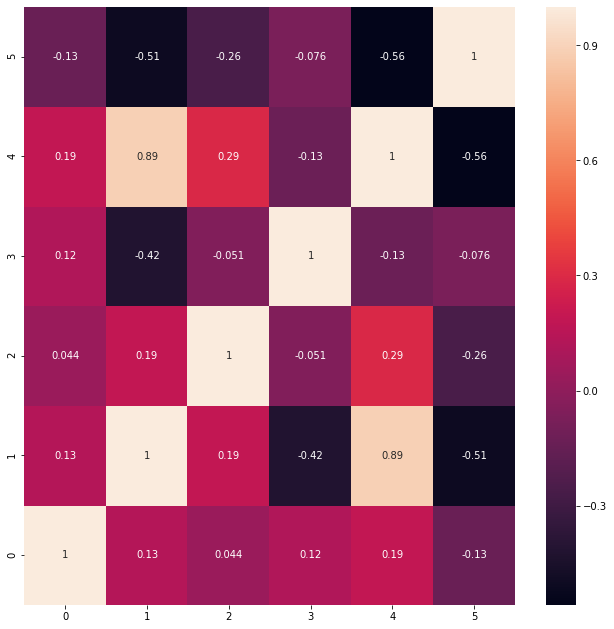

In [26]:
plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix, annot=True)
plt.ylim(0, correlation_matrix.shape[0])
plt.show()